# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 5, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE

# The global keyword (helpful info for exercise 2)
In exercise 2 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [2]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1 (exercise 6.6(d), 2.5 pts)
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.

YOUR ANSWER HERE

---
# Exercise 2

## (a) (1 point)
The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

YOUR ANSWER HERE

## (b) (2 points)
Implement the method of steepest descent. Use `scipy.optimize.line_search` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum: Make a plot of the convergence in the $(x,y)$ plane as well as plot of the norm of the error as a function of the step number.


Text(0, 0.5, 'Norm of the error')

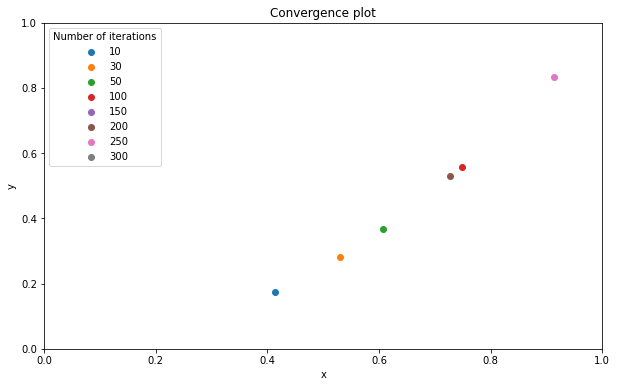

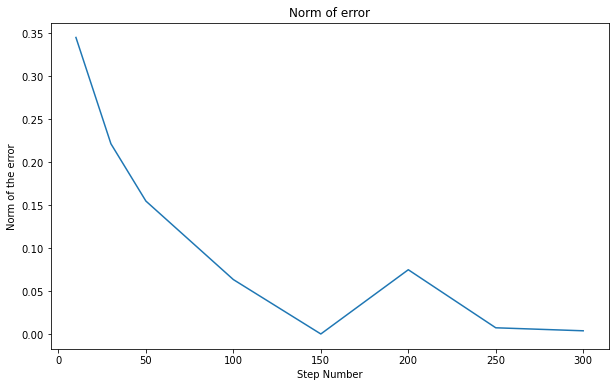

In [83]:
global gcount1
gcount1 = 0
from scipy.optimize import line_search
from numpy.linalg import norm
def stepest_descent(f,grad,x0,y0,k):
    global gcount1
    x = [x0,y0] 
    
    for i in range(k):
        alpha = line_search(f, grad, np.array(x), np.array([- grad(x)[0],- grad(x)[1]]))
        gcount1 += alpha[2]
        x[0] = x[0] - grad(x)[0]*alpha[0]
        x[1] = x[1] - grad(x)[1]*alpha[0]
        gcount1 += 2
    return x
def Rosenbrock(x):
    R = 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
    return R
def Rosenbrock_grad(x):
    grad_x = 2*(200*x[0]**3 -200*x[0]*x[1] + x[0] -1)
    grad_y = 200*(x[1]-x[0]**2)
    return [grad_x, grad_y]
stepest_descent(Rosenbrock, Rosenbrock_grad,0,0,300)

max_k = [10,30, 50,100,150,200,250,300]
result1 = []
error = []
gc_arr1 = []
plt.figure(figsize=(10, 6))
for k in max_k:
    gcount1 = 0
    x,y = stepest_descent(Rosenbrock, Rosenbrock_grad,0,0,k)
    error = norm(Rosenbrock([x,y]))
    result1.append([x,y,k,error])
    gc_arr1.append(gcount1)
    plt.scatter(result1[len(result1)-1][0], result1[len(result1)-1][1],label= f"{k}")
plt.ylim([0,1])
plt.xlim([0,1])
plt.title(label="Convergence plot")
plt.xlabel ('x')
plt.ylabel ('y')
plt.legend(title="Number of iterations")
result1 = np.array(result1)

plt.figure(figsize=(10, 6))


plt.title(label="Norm of error")
plt.plot(result1[:,2],result1[:,3])
plt.xlabel('Step Number')
plt.ylabel('Norm of the error')


## (c) (1.5 points)

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [81]:
import numpy as np
import scipy.linalg as la

def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def grad_f(x):
    return np.array([x[0], 5*x[1]])

def BFGS(grad, x0, error=None, maxit=None, mode=None):
    iters = 0
    gfk = grad(x0)
    grad_count = 1
    N = len(x0)

    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0

    if maxit is None:  maxit = len(x0) * 1000
    while la.norm(gfk) > error and iters < maxit:
        pk = -np.dot(Hk, gfk)
        xkp1 = xk + pk
        sk = xkp1 - xk
        xk = xkp1
        gfkp1 = grad(xkp1)
        grad_count += 1
        yk = gfkp1 - gfk
        gfk = gfkp1

        r = 1.0 / (np.dot(yk, sk))
        A1 = I - r * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - r * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (r * sk[:, np.newaxis] * sk[np.newaxis, :])
        iters += 1
        
        if mode == 1:
            print(xk)

    return (xk, iters, grad_count)

result, iters, gcount = BFGS(grad_f, np.array([5, 1]), error=10e-5, mode=1)

print('Final point:', result)
print('Iterations:', iters)
print('Gradient evaluations:', gcount)

[ 0 -4]
[-2.22222222  0.44444444]
[0.81632653 0.08163265]
[-0.00915314 -0.01533152]
[-0.00054233  0.00092339]
[ 1.49482806e-05 -1.58372937e-06]
Final point: [ 1.49482806e-05 -1.58372937e-06]
Iterations: 6
Gradient evaluations: 7


## (d) (1 points)

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

Text(0, 0.5, 'Norm of the error')

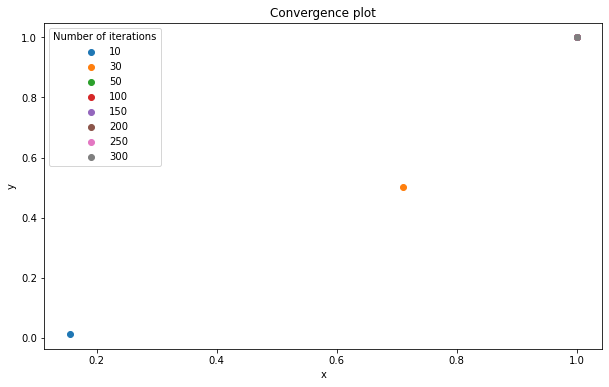

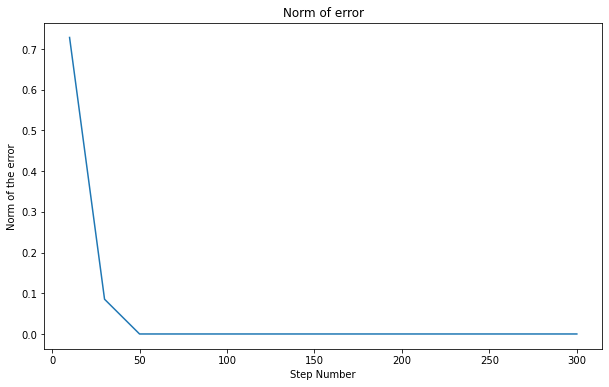

In [82]:
def Rosenbrock_grad(x):
    grad_x = 2*(200*x[0]**3 -200*x[0]*x[1] + x[0] -1)
    grad_y = 200*(x[1]-x[0]**2)
    return np.array([grad_x, grad_y])

max_k = [10,30, 50,100,150,200,250,300]
result2= []
error = [] 
gc_arr2 = []
plt.figure(figsize=(10, 6))
for k in max_k:
    x,y = bfgs_method(Rosenbrock, Rosenbrock_grad, np.array([0,0]), maxiter=k)[0]
    gcount = bfgs_method(Rosenbrock, Rosenbrock_grad, np.array([0,0]), maxiter=k)[2]
    error = norm(Rosenbrock([x,y]))
    result2.append([x,y,k,error])
    gc_arr2.append(gcount)
    plt.scatter(result2[len(result2)-1][0], result2[len(result2)-1][1],label= f"{k}")

plt.title(label="Convergence plot")
plt.xlabel ('x')
plt.ylabel ('y')
plt.legend(title="Number of iterations")
result2 = np.array(result2)

plt.figure(figsize=(10, 6))


plt.title(label="Norm of error")
plt.plot(result2[:,2],result2[:,3])
plt.xlabel('Step Number')
plt.ylabel('Norm of the error')

Note: first plot shows clustered points at x = y = 1 as a result of method's fast convergence

## (e) (1 point)
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.

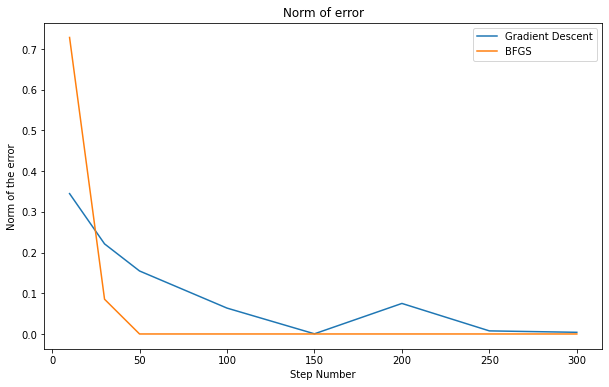

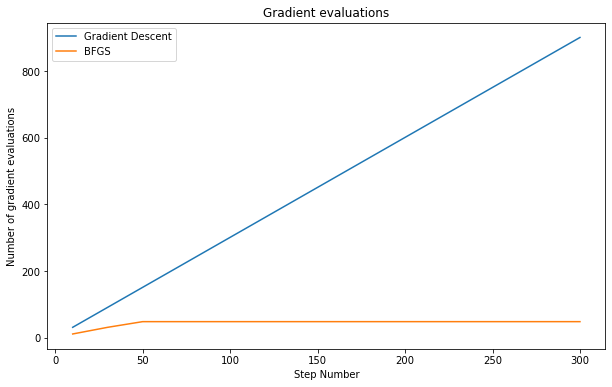

In [72]:
plt.figure(figsize=(10, 6))
plt.title(label="Norm of error")
plt.plot(result1[:,2], result1[:,3], label='Gradient Descent')
plt.plot(result2[:,2], result2[:,3], label='BFGS')
plt.xlabel('Step Number')
plt.ylabel('Norm of the error')
plt.legend()

plt.figure(figsize=(10, 6))
plt.title(label="Gradient evaluations")
plt.plot(result1[:,2], gc_arr1, label='Gradient Descent')
plt.plot(result1[:,2], gc_arr2, label='BFGS')
plt.xlabel('Step Number')
plt.ylabel('Number of gradient evaluations')
plt.legend()

BFGS method shows much faster convergence compared to Gradient Descent. BFGS also shows significantly lower computational complexity for the particular function and starting point. 